In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [42]:
df = pd.read_excel(r"C:\Users\jagad\Desktop\Dataset\Insurance Prediction.xlsx")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [43]:
df.shape

(1000, 39)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [45]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


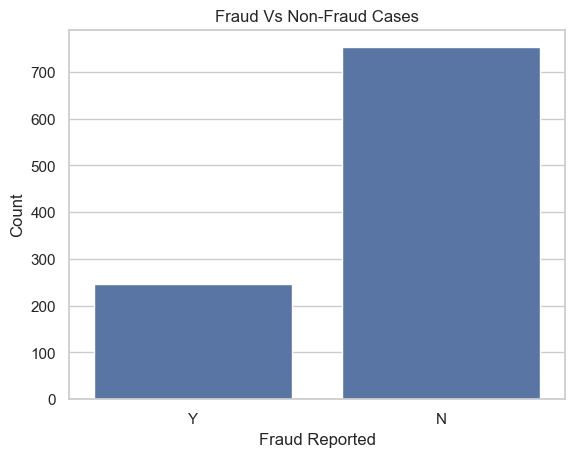

In [46]:
sns.countplot(x='fraud_reported', data=df)
plt.title("Fraud Vs Non-Fraud Cases")
plt.xlabel("Fraud Reported")
plt.ylabel("Count")
plt.show()

In [47]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

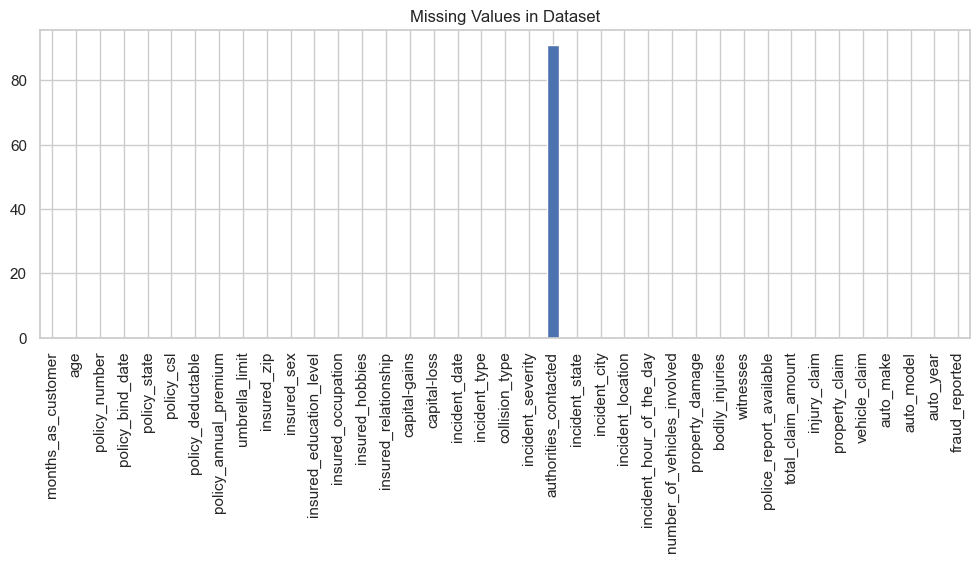

In [48]:
df.isnull().sum().plot(kind='bar',figsize=(12,4))
plt.title("Missing Values in Dataset")
plt.show()

# Handling Missing Values

In [49]:
#Numerical Columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(),inplace=True)

In [50]:
#Categorical Columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

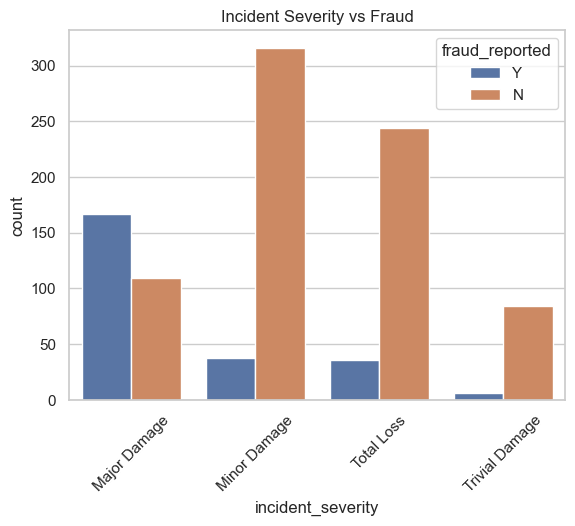

In [51]:
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title("Incident Severity vs Fraud")
plt.xticks(rotation=45)
plt.show()

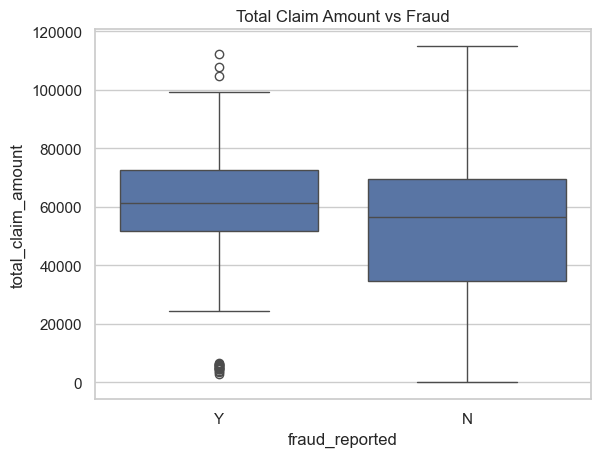

In [52]:
sns.boxplot(x="fraud_reported", y='total_claim_amount', data=df)
plt.title("Total Claim Amount vs Fraud")
plt.show()

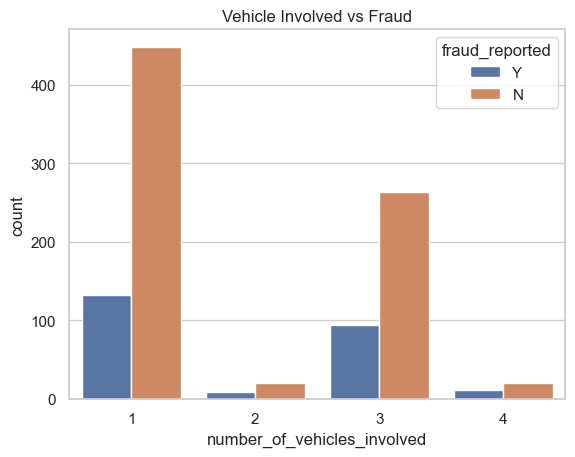

In [53]:
sns.countplot(x='number_of_vehicles_involved', hue="fraud_reported", data=df)
plt.title("Vehicle Involved vs Fraud")
plt.show()

In [54]:
#Dropping Date Column
df.drop(["policy_bind_date", 'incident_date'], axis=1, inplace=True)

In [55]:
#Encode Target Column
df['fraud_reported'] = df['fraud_reported'].map({'Y':1,'N':0})

In [57]:
df = pd.get_dummies(df, drop_first=True)

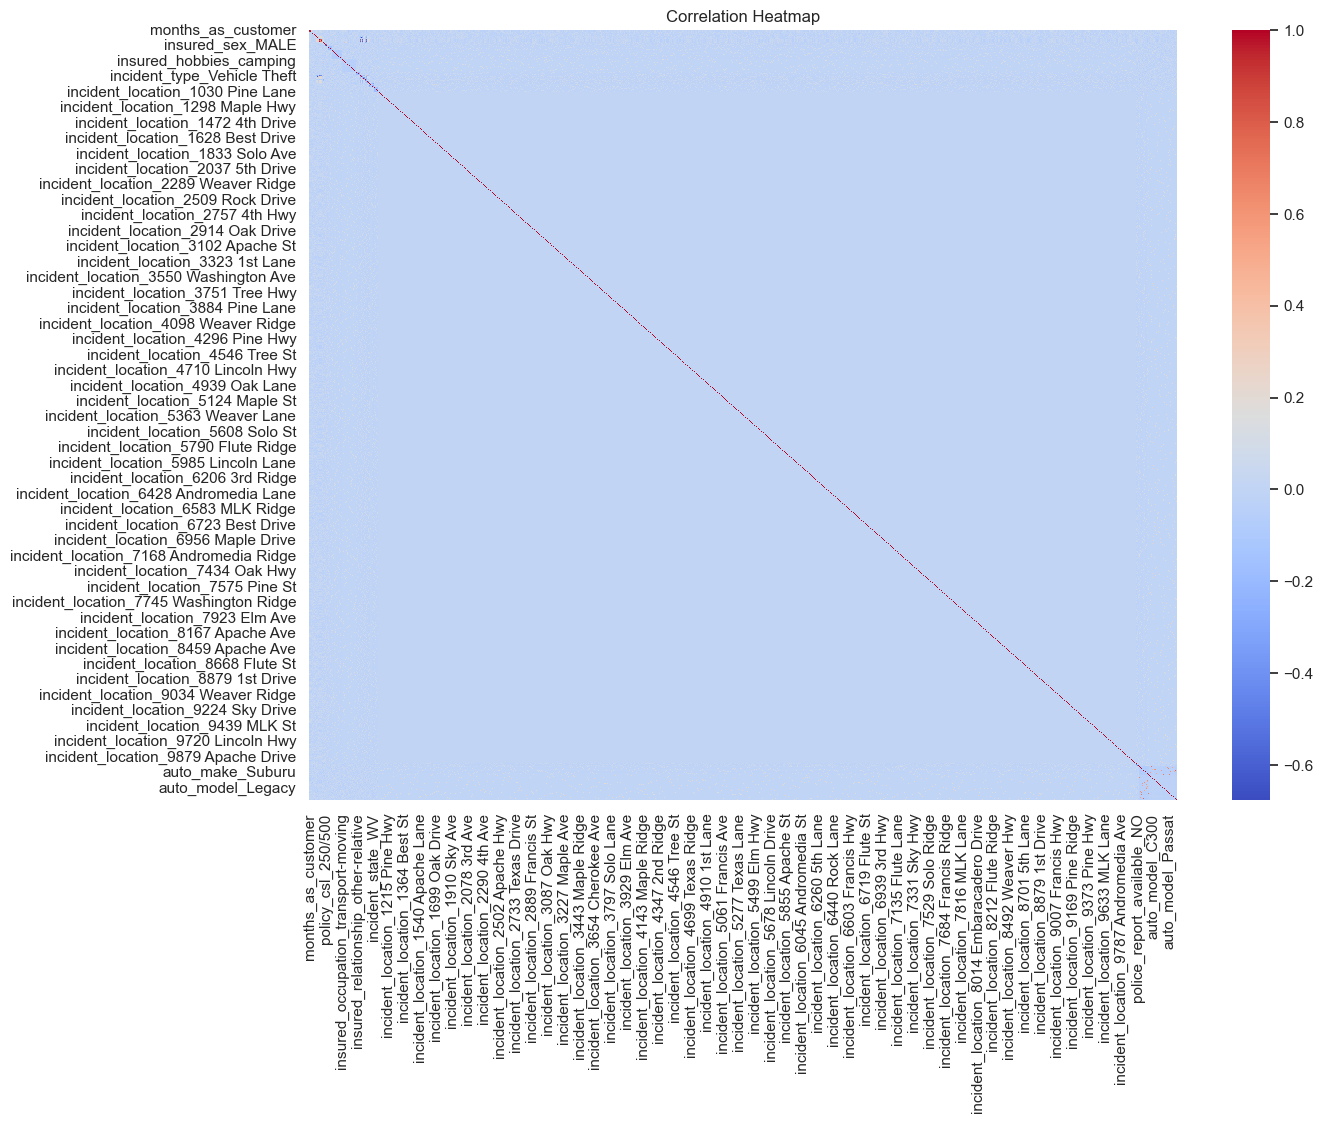

In [59]:
#Correlation Heat Map 
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
X=df.drop('fraud_reported', axis=1)
y=df['fraud_reported']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [64]:
from sklearn.impute import SimpleImputer

In [66]:
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

accuracy_lr

0.73

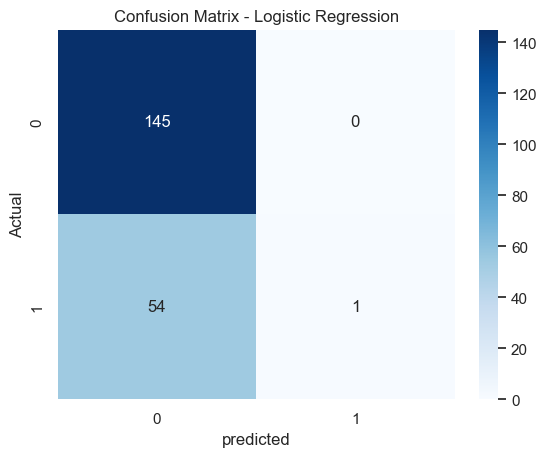

In [69]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf

0.72

In [71]:
print("Logistic Regression Accuracy :", accuracy_lr)
print("Random Forest Accuracy      :", accuracy_rf)

Logistic Regression Accuracy : 0.73
Random Forest Accuracy      : 0.72


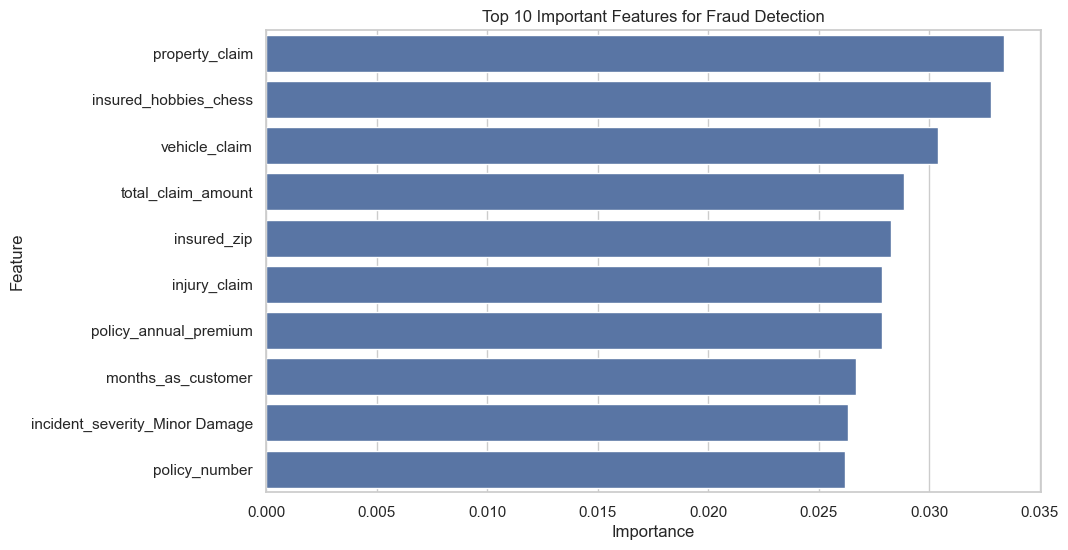

In [74]:
importances = rf.feature_importances_  # Fixed variable name spelling

feature_df = pd.DataFrame({  # Fixed variable name spelling
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)  # Fixed column name spelling

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))  # Changed 'X' to lowercase 'x'
plt.title("Top 10 Important Features for Fraud Detection")
plt.show()